In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Jupyter Specifics
from IPython.display import HTML
from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout

%matplotlib inline

style = {'description_width': '150px'}
slider_layout = Layout(width='50%')

## Today's agenda

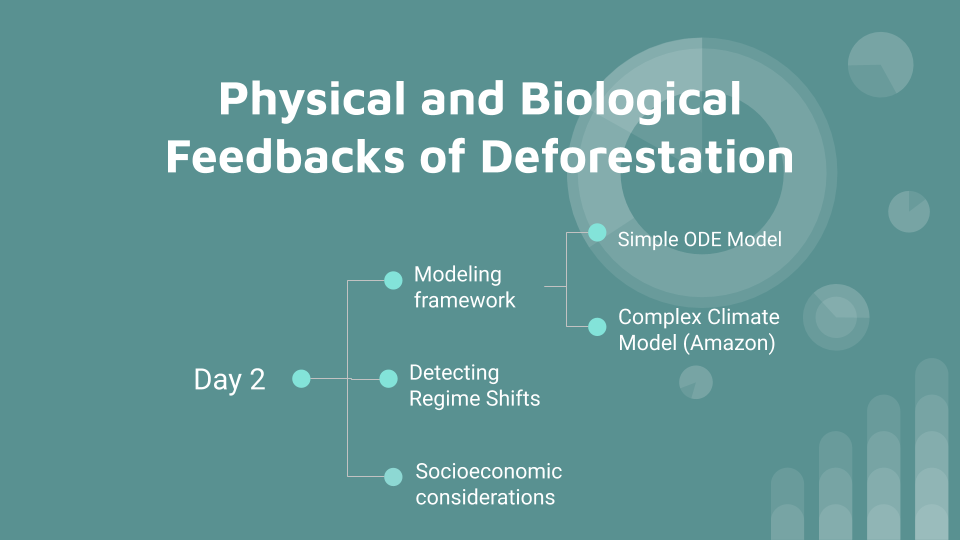

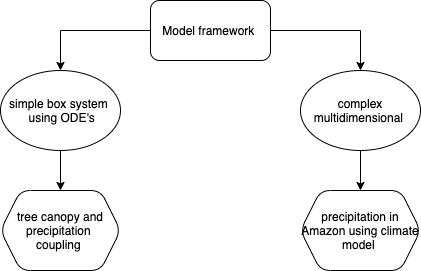

## Box model coupling mechanism

Modified equation for:

- $\dfrac{dP}{dt}$ derived from *Van Nes et al. (2013): Tipping points in tropical tree cover:  https://doi-org.ezproxy.library.ubc.ca/10.1111/gcb.12398*


- $\dfrac{dT}{dt}$ obtained from *A.Staal et al. (2015): https://doi.org/10.1016/j.ecocom.2015.01.003*

### Equation 

#### Precipitation (mm $yr^{-1}$) as a function of Tree cover (%) : $$\dfrac{dP}{dt}=r_p\big(\big(P_d+b\dfrac{T}{K}\big)-P\big)$$

####  Tree Cover (%) as a function of Precipitation (mm $yr^{-1}$): 

$$\dfrac{dT}{dt}= r_m\dfrac{P}{h_p+p}T\big(1-\dfrac{T}{K}\big)$$


where 

$r_p$ = maximum rate towards equilibrium for precipitation ($yr^{-1})$

$P_d$ = Precipitation on bare ground (no vegetation) (mm $yr^{-1})$

$K$ = maximum tree cover (%)

$T$ = tree cover (%)

$b$ = Strength of effect of vegetation cover on precipitation (mm $yr^{-1})$

$P$ = mean annual precipitation (mm $yr^{-1})$

$r_m$ = maximum expansion rate of tree cover ($yr^{-1})$

$\frac{T}{K} =$ fractional tree cover 

$h_p$ = half saturation of growth term (mm$yr^{-1}$)



`Note: Model does not capture all mechanisms in alternating stable states.`

In [148]:
#constants (referenced from Egbert et al. and A.Staal et al.)

global K,Pd,b,rp,rm, hp

K = 90
Pd = 10  # [36-365 mm yr^{-1}]
b = 0.5
rp = 1   # max expansion to equilibrium
rm = 0.3 # maximum tree-cover growth rate
hp = 80


## Test 1

In [149]:
def main(T, p, p0, T0 , yr):

    def function(s, t):
        p, T = s
        pdot = np.array([
        Pd+b*T/K-p,     #dP/dt change in precipitation
        rm*p/(hp+p)*T*(1-T/K)        #dT/dt = change in tree cover 
        ])
        return pdot
    
#     def function(s, t):
#         p, T = s
#         pdot = np.array([
#         10+0.5*T/90-p,     #dP/dt change in precipitation
#         0.003*p*(1-T/90)        #dT/dt = change in tree cover 
#         ])
        
#         return pdot

    
    
    time = np.arange(0, yr, 0.01)
    initial_conditions = [T0, p0]
    solution = odeint(function, initial_conditions, time)

    #Graphic details
    fig, axes = plt.subplots(1,3, figsize = (20,8))
    
    #first plot
    ax = axes[0]
    ax.plot(time, solution[:, 0], label='Precipitation')    
    ax.set_xlim([0, yr])
    ax.set_ylim([0, max(solution[:, 0])])
    ax.set_xlabel('Year')
    ax.set_ylabel('Precipitation ((mm yr^-1))')
    ax.legend(loc='best')
    ax.grid()
    
    #second plot
    ax = axes[1]
    ax.plot(time, solution[:, 1], label='Tree Cover')   
    ax.set_xlim([0, yr])
    ax.set_ylim([0, max(solution[:, 0])])
    ax.set_xlabel('Year')
    ax.set_ylabel('Tree Cover (%)')
    ax.legend(loc='best')
    ax.grid()
    
    #third plot
    ax = axes[2]
    ax.plot(solution[:, 0], solution[:, 1],label='potential landscape')   
    ax.set_xlim([0, max(solution[:, 0])])
    ax.set_ylim([0, max(solution[:, 0])])
    ax.set_xlabel('Precipitation (mm yr^-1)')
    ax.set_ylabel('Tree Cover')
    ax.legend(loc='best')
    ax.grid()
    
    plt.show()

interact(main, T0=FloatSlider(min=0, max=90, step=1, value=1, description='Initial tree cover', style=style, layout=slider_layout),
               p0=FloatSlider(min=0, max=100, step=1, value=3, description='Initial precipitation', style=style, layout=slider_layout),
               T=FloatSlider(min=0, max=100, step=1, value=10, description='Percentage of tree cover', style=style, layout=slider_layout),
               p=FloatSlider(min=0 , max=10, step=0.1, value=2, description='Mean Precipitation', style=style, layout=slider_layout),
               yr=FloatSlider(min=0 ,max=570 , step=1, value=15, description='Total number of Years', style=style, layout=slider_layout),
        );

interactive(children=(FloatSlider(value=10.0, description='Percentage of tree cover', layout=Layout(width='50%…

## Ideal equilibria model reference (Van Nels et. al) 

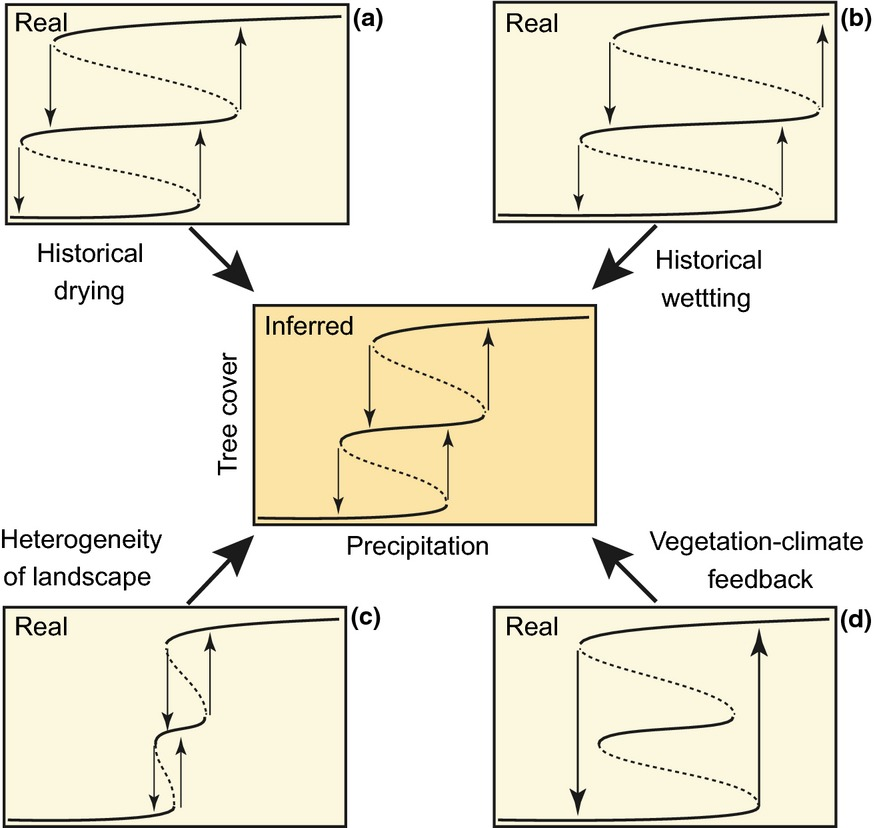



# How the interaction between precipitation reduction and deforestation may cause a regime shift in the model?

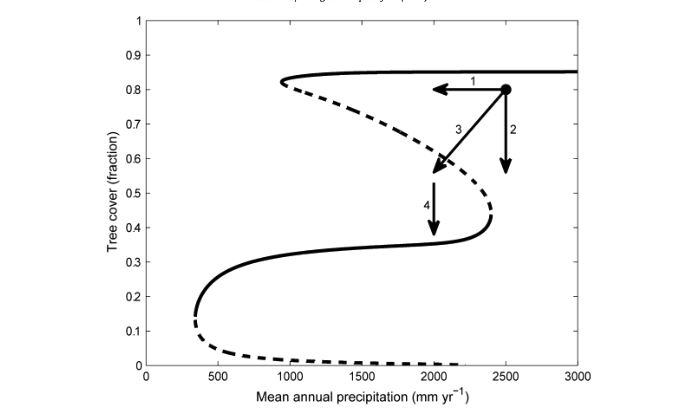

Imagine in a forested area with T = 0.80 at P = 2500 mm yr-1:

1. a decrease in precipitation of 20% takes place
 - no changes in the state of the system would be apparent, as the system is still in the basin of attraction of the forest state. 
2. savanna has become an alternate stable state, so a simultaneous deforestation of 30% 
3. push the system across the unstable equilibrium 
4. The system then moves to the savanna state 


`Note:  that the position of a site relative to the unstable equilibrium line in the model determines at which combinations of precipitation reduction and deforestation the system undergoes regime shifts.`

### TODO:

- cross check the formula (physical representation makes sense). Equation from Van Nes et al had **fire intensity included**: 
 
 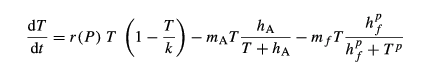
 
 
- continue with RK4 plot 
- include other feedbacks 



# Global Climate Model - Amazon

Datset: 

- mean precipitation (1961-2002) from Climate Research Unit (CRU):(950-2400 mm yr^-1)
- tree cover data (31 October 2000 to 9 December 2001)
- excluded human- used areas and water bodies
- adjusted hP value to better match the tree-cover data at low precipitation values, include fire interval and fire return frequency.
- location: include forest - savanna

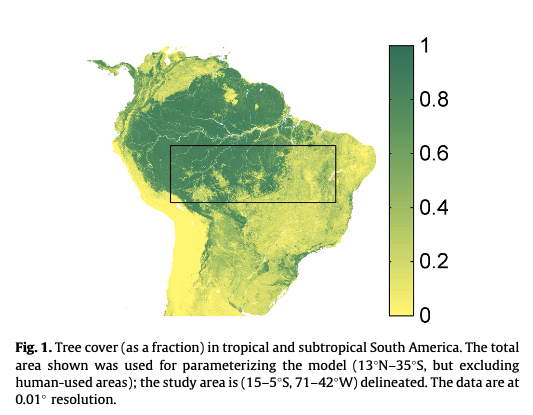

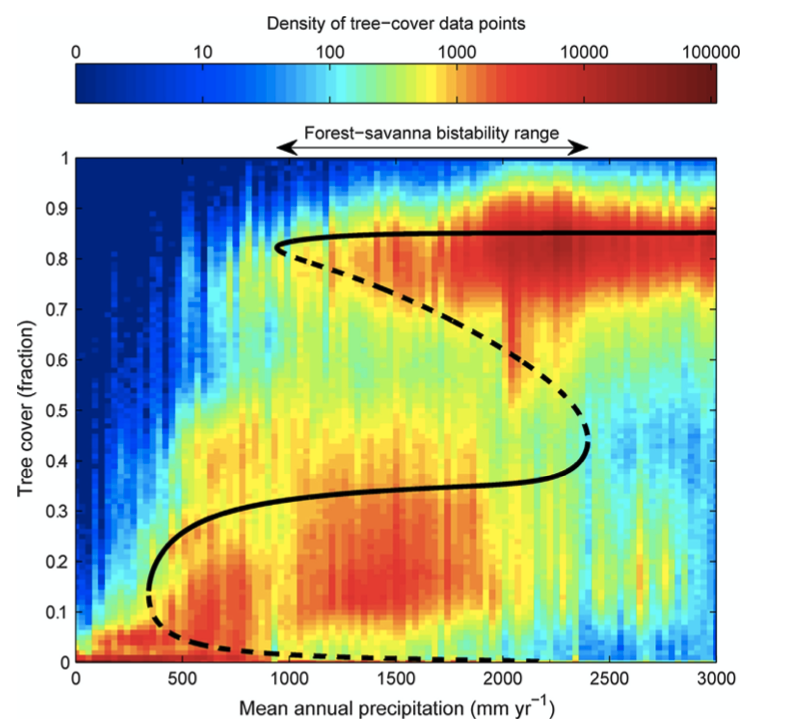

**Fig. 2**. Equilibria of the model. The stable (solid lines) and unstable (dashed lines) equilibria of the model are shown with the background showing the frequency of tree cover values from tropical and sub-tropical South America. The data at 0.018 resolution (Hirota et al., 2011) are displayed on a 101 􏱈 101 lattice. Only tree-cover values at locations with MAP up to 3000 mm yr-1 are shown (n = 8723784). Note the logarithmic scale along which the distribution of the data is presented.

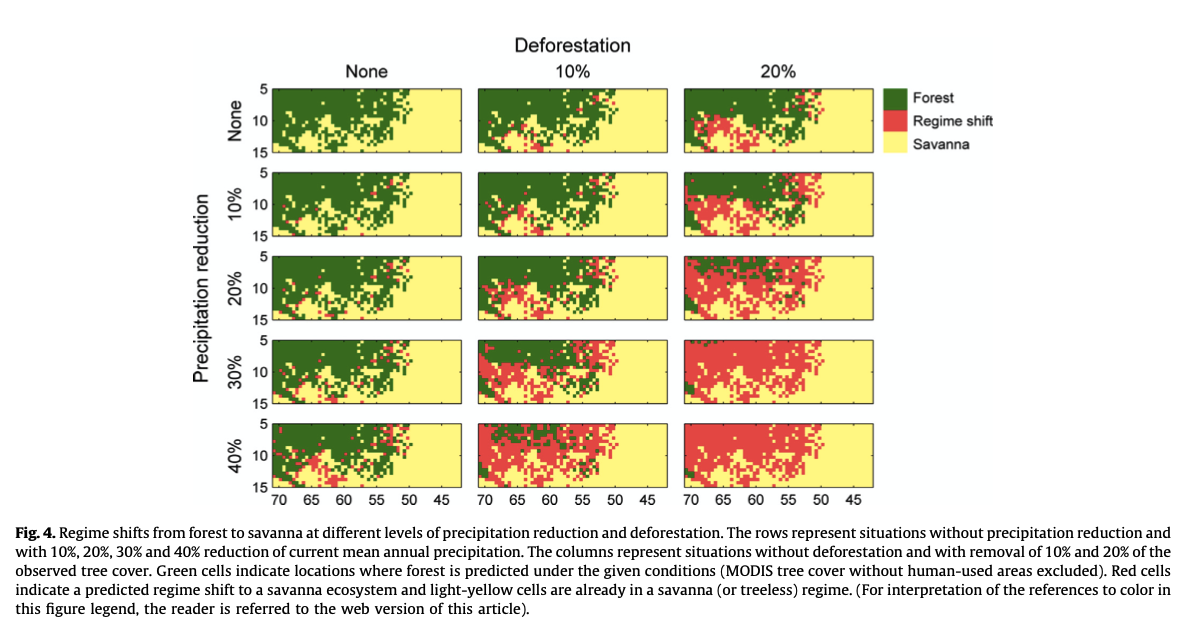

# OVER TO REGIME SHIFTING!

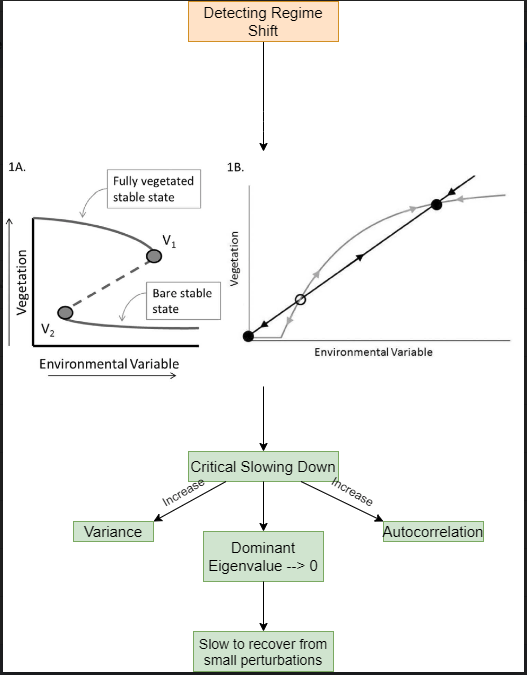

## Appendix

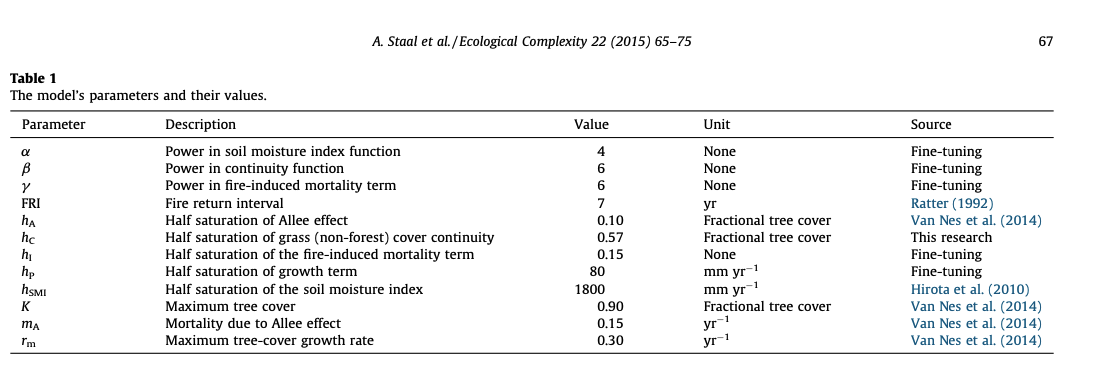

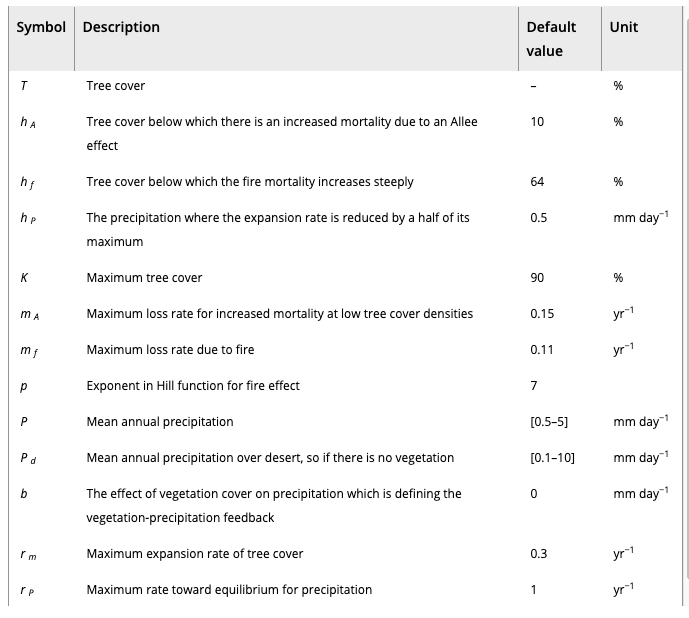

## Test 2: Runga Kutta 

code obtained from EOSC 453 course page: https://www.eoas.ubc.ca/~mjelline/453website/eosc453/EOSC4530utline_13.htm

In [96]:
global K,Pd,b,rp,rm

#constants
K = 90
Pd = 10
b = 0.5
rp = 1 #max expansion to equilibrium
rm = 0.3

In [97]:
def rk4(fxy, x0, xf, y0, z0, N):
    
    # The inputs to the function are:
    #         fxy = the name of the function containing f(x,y) (e.g. oneode, twoode)
    #         xo,xf = initial and final values of the independent variable (integers or floats)
    #         yo = initial value of dependent variable at xo (numpy array)
    #         N = number of intervals to use between xo and xf (integer)

    # The outputs to the function are:
    #         X = numpy array containing values of the independent variable
    #         Y = the estimated dependent variable at each value of the independent variable
    #         --> this variable is a 1D numpy array if only one equation is solved
    #         --> it is an M-D numpy array [y1(x) y2(x) ... ] for multiple (M) equations 

    #compute step size and size of output variables
    if N < 2:
        N = 2 #set minimum number for N
    h = (xf - x0) / N
    X = np.zeros((N+1, 1))
    M = np.max(np.shape(y0))
    Y = np.zeros((N+1, M))*1j #make complex by multiplying by 1j; this way can add complex values to this during integration
    Z = np.zeros((N+1, M))*1j
    
    #set initial conditions
    x = x0
    X[0] = x
    y = [complex(val) for val in y0]  #make complex
    Y[0,:] = y
    z = [complex(val) for val in z0]  #make complex
    Z[0,:] = z
    
    #begin computational loop
    for ii in range(N):
        
        k1 = np.array([h * val for val in fxy(x,y)]) #evaluate function fxy; depending on equation, k1-4 can be complex; this is why we make Y and y complex as well
        k2 = np.array([h * val for val in fxy(x+h/2, y+k1/2)])
        k3 = np.array([h * val for val in fxy(x+h/2, y+k2/2)])
        k4 = np.array([h * val for val in fxy(x+h, y+k3)])
        
        y += (k1 + 2*k2 + 2*k3 + k4) / 6.
        z += (k1 + 2*k2 + 2*k3 + k4) / 6.
        x += h
        X[ii+1] = x
        Y[ii+1,:] = y
        Z[ii+1,:] = z
    return X, Y, Z

def vege_ode(t,s):
    
    # input:
    #     t: float
    #     y: numpy array with one value

    # output:
    #     ydot: numpy array of same size as y
    
    global K,Pd,b,rp,rm
    y,z = s
    pdot = np.array([
        rp*Pd+rp*b*y[0]/K-rp*z[0],  #dP/dt change in precipitation
        r_m*y[0](1-y[0]/K) #dT/dt = change in veg cover 
    ])

    return pdot

In [98]:
#time interval for integration
time_min = 0.5
time_max = 5

#define a linearly-spaced vector with n points
n = 1000
timespan = -np.linspace(time_min, time_max, n)

#array of initial conditions defined in the function 'vege_ode.ipynb'
y0 = np.array([100.])
z0 = np.array([100.])





In [99]:
[t,s] = rk4(fxy = vege_ode,
           x0 =  time_min,
           xf = time_max,
           y0 = y0,
           z0 = z0,
           N = n)

ValueError: not enough values to unpack (expected 2, got 1)

/Users/angeleneleow/opt/anaconda3/envs/cpsc330env/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/angeleneleow/opt/anaconda3/envs/cpsc330env/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/angeleneleow/opt/anaconda3/envs/cpsc330env/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


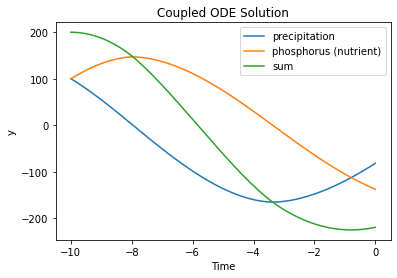

In [100]:
plt.plot(tt,yy[:,0], label = 'precipitation')
plt.plot(tt,yy[:,1], label = 'phosphorus (nutrient)')
plt.plot(tt, yy[:,0] + yy[:,1], label = 'sum')
plt.xlabel('Time')
plt.ylabel('y')
plt.title('Coupled ODE Solution')
plt.legend()

plt.show()